In [6]:
triples_path = '../output/ukwac-triples-filtered.tsv.gz'

In [7]:
%matplotlib inline
import pandas as pd
from collections import Counter
import seaborn as sns

# Reading data

In [8]:
triples_df = pd.read_csv(triples_path, delimiter='\t', compression='gzip')
triples_df.head()

,sbj,verb,dobj
0,citizen,describe,birthplace
1,paper,show,birthplace
2,information,include,birthplace
3,cannot,find,birthplace
4,publication,list,birthplace


In [11]:
triples_df.sample(10)

,sbj,verb,dobj
1857327,loss,act,war
7208684,scheme,demand,fluency
840535,highlight,include,training
4616740,player,require,point
6371555,news,will,ear
7048926,cloud,shield,moon
3404747,conference,discuss,delivery
3645543,firm,have,list
6268701,cost,rule,lending
2730877,offender,make,comment


In [4]:
print("Number of tuple instances: {0:,d}".format(len(triples_df)))

Number of tuple instances: 7,299,599


In [5]:
print("Number of tuple types: {0:,d}".format(len(triples_df.drop_duplicates())))

Number of tuple types: 4,261,954


In [5]:
def countplot_most_common(tokens, n=50, title=None):
    token_counts = Counter(tokens)
    token_counts_df = pd.DataFrame(token_counts.most_common(n), columns=['token', 'count'])
    ax = sns.barplot(x='token', y='count', data=token_counts_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

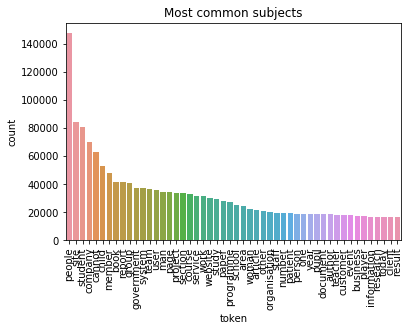

In [13]:
countplot_most_common(triples_df.sbj, title="Most common subjects")

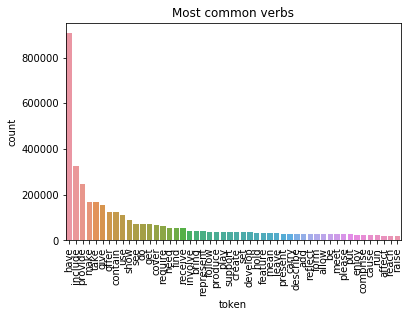

In [14]:
countplot_most_common(triples_df.verb, title="Most common verbs")

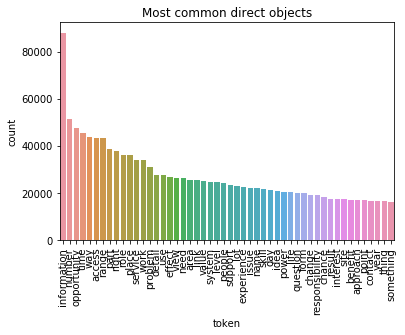

In [15]:
countplot_most_common(triples_df.dobj, title="Most common direct objects")

In [9]:
sampled_triples = triples_df.sample(100000) # so that next plots are about the same sample

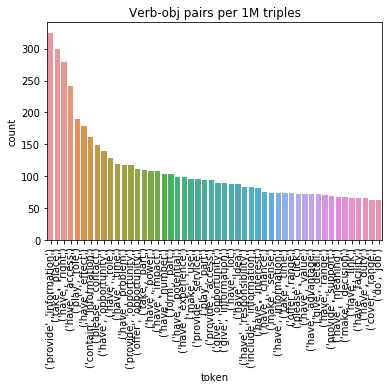

In [10]:
countplot_most_common(((r['verb'], r['dobj']) for _, r in sampled_triples.iterrows()),
                      title="Verb-obj pairs per 1M triples")

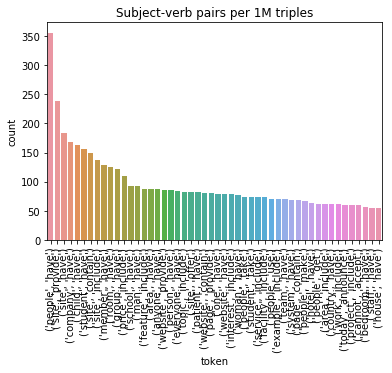

In [11]:
countplot_most_common(((r['sbj'], r['verb']) for _, r in sampled_triples.iterrows()),
                      title="Subject-verb pairs per 1M triples")

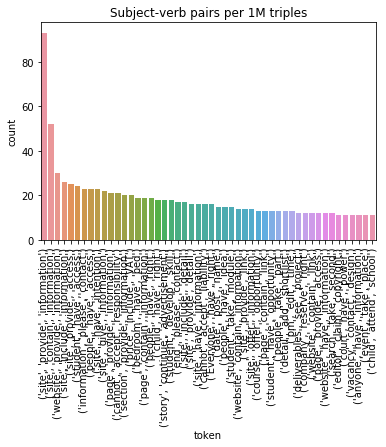

In [12]:
countplot_most_common((tuple(r) for _, r in sampled_triples.iterrows()),
                      title="Subject-verb pairs per 1M triples")